<a href="https://colab.research.google.com/github/chandra17iith/My_ML/blob/main/Unsupervised_Learning_KClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('Mall_Customers.csv')
x=df.iloc[:,[3,4]].values

# Kmeans Clustering

**Kmeans Clustering**
* we dont know what to predict and how many clusters will be there so we will be using `elbow method` which helps to identify the number of clusters
* we will look for pattern in the data

The algorithm works as follows:  

* First, we randomly initialize k points, called means or cluster centroids.
* We categorize each item to its closest mean, and we update the mean’s coordinates, which are the averages of the items categorized in that cluster so far.
* We repeat the process for a given number of iterations and at the end, we have our clusters.

# Disadvantage of K means clustering

One disadvantage of the K-means algorithm is that it is sensitive to the initialization of the centroids or the mean points. So, if a centroid is initialized to be a “far-off” point, it might just end up with no points associated with it, and at the same time, more than one cluster might end up linked with a single centroid. Similarly, more than one centroid might be initialized into the same cluster resulting in poor clustering

To avoid the above condition we use Kmeans++
1. Randomly select the first centroid from the data points.
2. For each data point compute its distance from the nearest, previously chosen centroid.
3. Select the next centroid from the data points such that the probability of choosing a point as centroid is directly proportional to its distance from the nearest, previously chosen centroid. (i.e. the point having maximum distance from the nearest centroid is most likely to be selected next as a centroid)
4. Repeat steps 2 and 3 until k centroids have been sampled

# Using elbow method to find optimum cluster

In [7]:
from sklearn.cluster import KMeans
## we will measure the wcss which is the sum of sqaure of disatnce of the point from the centroid
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_) # gives the wcss value




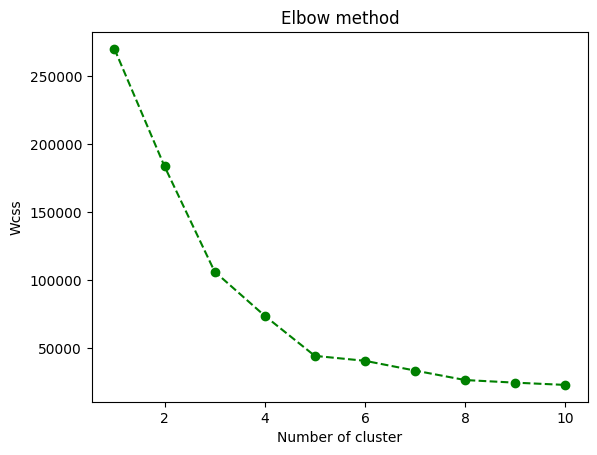

In [9]:
# plotting the wcss vs number of cluster
plt.plot(range(1,11),wcss,'o--g')
plt.xlabel('Number of cluster')
plt.ylabel('Wcss')
plt.title('Elbow method')
plt.show()

it looks like 5 is the optimum number of cluster is 5

# Training K-Means model on the dataset

In [15]:
model=KMeans(n_clusters=5,init='k-means++',random_state=42)
y=model.fit_predict(x)
print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


# Visualising the model

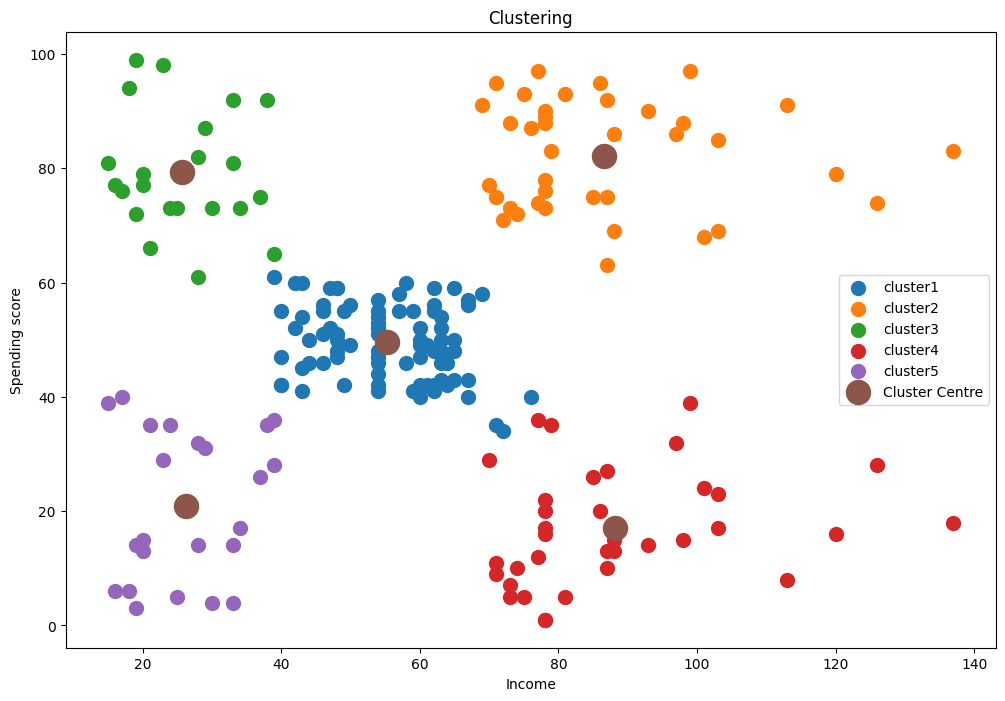

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(x[y==0,0],x[y==0,1],s=100,label='cluster1')
plt.scatter(x[y==1,0],x[y==1,1],s=100,label='cluster2')
plt.scatter(x[y==2,0],x[y==2,1],s=100,label='cluster3')
plt.scatter(x[y==3,0],x[y==3,1],s=100,label='cluster4')
plt.scatter(x[y==4,0],x[y==4,1],s=100,label='cluster5')
plt.scatter(model.cluster_centers_[:, 0],model.cluster_centers_[:, 1],s=300,label='Cluster Centre') # cluster centre
plt.xlabel('Income')
plt.ylabel('Spending score')
plt.title('Clustering')
plt.legend()
plt.show()

### we have inlcuded only two features but we can include more features